In [156]:
import numpy as np
import matplotlib.pyplot as plt

from moviepy.editor import VideoFileClip, concatenate_videoclips
import moviepy.audio.fx.all as afx
from moviepy.editor import vfx

In [165]:
clip = VideoFileClip("test_video_long.mov")
# clip.ipython_display(width=300)

# Finding low volume part

In [166]:
# Get sound

sound = clip.fx(afx.audio_normalize).audio.to_soundarray()
mono = sound.T[0]
wave = mono

In [167]:
# Get bitrate data

bit_per_frame = len(wave) // int(clip.fps * clip.duration)
audio_bitrate = bit_per_frame * clip.fps

print(f"\
fps: {clip.fps}\n\
audio_bitrate: {audio_bitrate}\n\
bit_per_frame: {bit_per_frame}\
")


fps: 60.0
audio_bitrate: 44100.0
bit_per_frame: 735


In [181]:
# Chunk sound into min volume

chunk_size = int(audio_bitrate)
chunk_number = len(wave) // chunk_size
number_of_points = chunk_size * chunk_number
chunked_wave = np.array_split(wave[:number_of_points], chunk_number)
matrix = np.asarray(chunked_wave)
matrix = np.stack(matrix)
volume_chunks = np.absolute(matrix).mean(1)

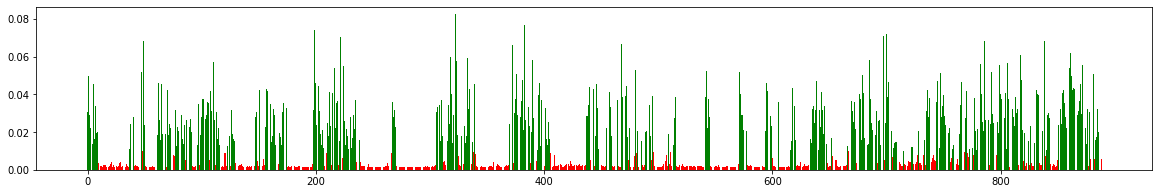

In [169]:
volume_threshold = 0.01
voice = volume_chunks >= volume_threshold
silence = volume_chunks < volume_threshold

plt.figure(figsize=(20,3))
plt.bar(np.arange(chunk_number)[voice], volume_chunks[voice], color="green")
plt.bar(np.arange(chunk_number)[silence], volume_chunks[silence], color="red")
plt.show()

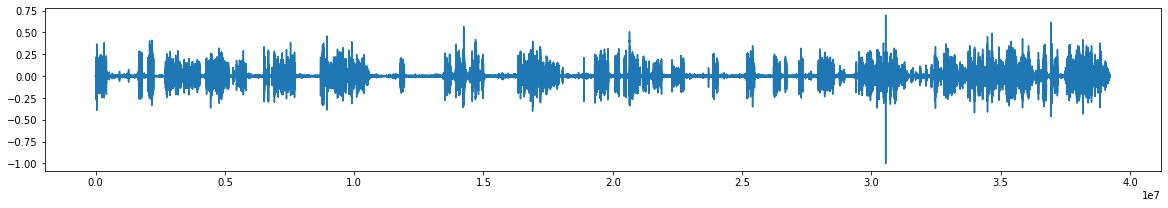

In [170]:
plt.figure(figsize=(20,3))
plt.plot(mono)

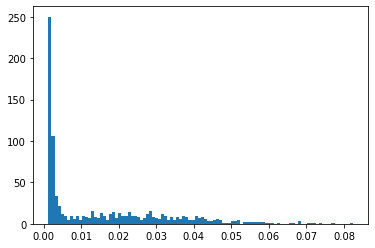

In [171]:
plt.hist(volume_chunks, bins=100);

In [175]:
chunks = []
clips = []
removable_chunk = None
normal_chunk = 0

for n in range(1,chunk_number-1):
    if removable_chunk == None\
    and volume_chunks[n] < volume_threshold\
    and volume_chunks[n-1] < volume_threshold\
    and volume_chunks[n+1] < volume_threshold:
        removable_chunk = n

    elif removable_chunk and volume_chunks[n] >= volume_threshold:
        if removable_chunk != 1:            
            chunks.append({
                "voice": True,
                "second": [normal_chunk, removable_chunk-1 + 0.9],
            })
            clips.append(clip.subclip(normal_chunk,removable_chunk-1 + 0.9))
        chunks.append({
            "voice": False,
            "second": [removable_chunk, n-2 + 0.9 ],
        })
        clips.append(clip.subclip(removable_chunk, n-2 + 0.9).fx(vfx.speedx, 4).fx(afx.volumex, 0))
        removable_chunk = None
        normal_chunk = n-1
        
if chunks[-1]["second"][1] < chunk_number:
    chunks.append({
        "voice": True,
        "second": [chunks[-1]["second"][1]+1, chunk_number],
    })
    print([chunks[-1]["second"][1]+1, chunk_number])
    clips.append(clip.subclip(chunks[-1]["second"][0], chunks[-1]["second"][1]))

# clips
chunks

[890, 889]


[{'voice': True, 'second': [0, 10.9]},
 {'voice': False, 'second': [11, 35.9]},
 {'voice': True, 'second': [36, 41.9]},
 {'voice': False, 'second': [42, 44.9]},
 {'voice': True, 'second': [45, 51.9]},
 {'voice': False, 'second': [52, 59.9]},
 {'voice': True, 'second': [60, 92.9]},
 {'voice': False, 'second': [93, 94.9]},
 {'voice': True, 'second': [95, 117.9]},
 {'voice': False, 'second': [118, 121.9]},
 {'voice': True, 'second': [122, 132.9]},
 {'voice': False, 'second': [133, 145.9]},
 {'voice': True, 'second': [146, 152.9]},
 {'voice': False, 'second': [153, 154.9]},
 {'voice': True, 'second': [155, 175.9]},
 {'voice': False, 'second': [176, 196.9]},
 {'voice': True, 'second': [197, 239.9]},
 {'voice': False, 'second': [240, 265.9]},
 {'voice': True, 'second': [266, 271.9]},
 {'voice': False, 'second': [272, 304.9]},
 {'voice': True, 'second': [305, 312.9]},
 {'voice': False, 'second': [313, 313.9]},
 {'voice': True, 'second': [314, 325.9]},
 {'voice': False, 'second': [326, 326.9]}

In [177]:
final_clip.write_videofile("test_video_long_EXPORTED_2.mp4",
    codec='libx264', 
    audio_codec='aac', 
    temp_audiofile='temp-audio.m4a', 
    remove_temp=True)

chunk:   0%|          | 2/13142 [00:00<11:07, 19.70it/s, now=None]

Moviepy - Building video test_video_long_EXPORTED_2.mp4.
MoviePy - Writing audio in temp-audio.m4a


t:   0%|          | 2/35760 [00:00<55:30, 10.74it/s, now=None]         

MoviePy - Done.
Moviepy - Writing video test_video_long_EXPORTED_2.mp4



Moviepy - Done !
Moviepy - video ready test_video_long_EXPORTED_2.mp4


In [178]:
len(chunks)

75

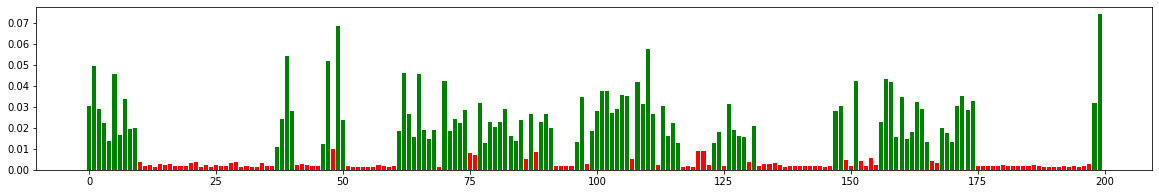

In [184]:
volume_chunks = volume_chunks[:200]
chunk_number = len(volume_chunks)
volume_threshold = 0.01
voice = volume_chunks >= volume_threshold
silence = volume_chunks < volume_threshold

plt.figure(figsize=(20,3))
plt.bar(np.arange(chunk_number)[voice], volume_chunks[voice], color="green")
plt.bar(np.arange(chunk_number)[silence], volume_chunks[silence], color="red")
plt.show()